In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [26]:
subset_renaming = {
    "nonexonic_AND_distal": "Non-exonic\n(distal)",
    "nonexonic_AND_proximal": "Non-exonic\n(proximal)",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

In [40]:
datasets = [
    "mendelian_matched_9",
    "gwas_matched_9",
]

subsets = [
    "nonexonic_AND_distal",
    "nonexonic_AND_proximal",
    "5_prime_UTR_variant",
    "3_prime_UTR_variant",
    "non_coding_transcript_exon_variant",
]

model = "Borzoi"


In [41]:
dfs = []

for dataset in datasets:
    for subset in tqdm(subsets):
        df = pd.read_csv(f"../../results/dataset/{dataset}/unsupervised_metrics/{subset}/{model}_L2_L2.csv")
        df = df[df.feature != "all"]
        df["dataset"] = dataset_renaming.get(dataset, dataset)
        df["subset"] = subset_renaming.get(subset, subset)
        dfs.append(df)
df = pd.concat(dfs)
df

100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 172.09it/s]


,AUPRC,feature,dataset,subset
0,0.277214,DNASE,Mendelian traits,Non-exonic\n(distal)
1,0.266409,CHIP,Mendelian traits,Non-exonic\n(distal)
2,0.266364,RNA,Mendelian traits,Non-exonic\n(distal)
4,0.234255,ATAC,Mendelian traits,Non-exonic\n(distal)
5,0.208948,CAGE,Mendelian traits,Non-exonic\n(distal)
0,0.720560,RNA,Mendelian traits,Non-exonic\n(proximal)
2,0.677605,ATAC,Mendelian traits,Non-exonic\n(proximal)
3,0.672930,CHIP,Mendelian traits,Non-exonic\n(proximal)
4,0.523726,CAGE,Mendelian traits,Non-exonic\n(proximal)
5,0.496973,DNASE,Mendelian traits,Non-exonic\n(proximal)


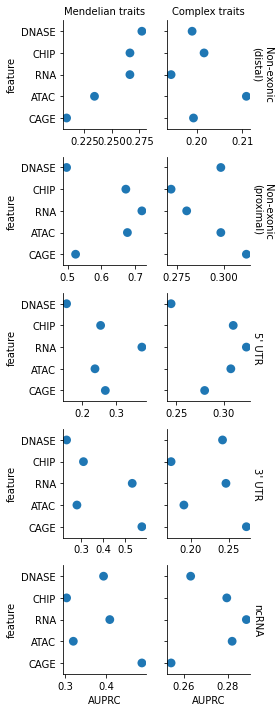

In [42]:
g = sns.catplot(
    data=df,
    y="feature",
    x="AUPRC",
    col="dataset",
    row="subset",
    sharex=False,
    kind="point", join=False,
    height=2,
    margin_titles=True,
)
g.set_titles(col_template="{col_name}", row_template="{row_name}");